In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(os.getcwd())
%cd ../../..

/Users/elizagoler/Documents/RecessionFertility/source/derived/regional_employment
/Users/elizagoler/Documents/RecessionFertility


In [14]:
us_state_abbreviations = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL',
    'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME',
    'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH',
    'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI',
    'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI',
    'WY'
]

dataframes = []
data_dir = 'datastore/raw/bea_county_employment_1969-00/data'

for state_abbr in us_state_abbreviations:
    filename = f'CA25_{state_abbr}'
    filepath = os.path.join(data_dir, filename)
    # Try reading as .csv, but if file doesn't have an extension, just try the filename.
    if os.path.exists(filepath + '.csv'):
        df = pd.read_csv(filepath + '.csv')
    elif os.path.exists(filepath):
        df = pd.read_csv(filepath)
    else:
        # Optionally, skip or raise an error if not found.
        print(f"Warning: File for {state_abbr} not found.")
        continue
    dataframes.append(df)

all_states_df = pd.concat(dataframes, ignore_index=True)

In [16]:
all_states_df = all_states_df[all_states_df["LineTitle"].astype(str).str.strip() == "Wage and salary employment"]


In [17]:
all_states_df.head()

,FIPS,Region,Table,LineCode,FirstYear,LineTitle,AreaName,1969,1970,1971,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
1,01000,5.0,CA25,20.0,1969.0,Wage and salary employment,Alabama state total,1215450,1218905,1222393,...,1756471,1791538,1828907,1857135,1902929,1923645,1960015,1994380,2007121,2008802
24,01001,5.0,CA25,20.0,1969.0,Wage and salary employment,"Autauga, AL",5457,5650,5741,...,9038,9343,9509,9808,9934,10392,10740,11274,11515,11884
47,01003,5.0,CA25,20.0,1969.0,Wage and salary employment,"Baldwin, AL",14886,14713,15157,...,32062,33582,35687,38556,41599,43278,46135,49430,51984,53281
70,01005,5.0,CA25,20.0,1969.0,Wage and salary employment,"Barbour, AL",7149,7323,7406,...,10608,10614,11062,11390,11119,10992,11161,11875,12483,12846
93,01007,5.0,CA25,20.0,1969.0,Wage and salary employment,"Bibb, AL",3344,3259,3243,...,4320,4609,4477,4613,4823,4725,4743,4773,4676,4609


**Calculate economic conditions indicator for all county x years**

In [23]:
# 1. Select only the numeric year columns (columns that are digits)
year_columns = [col for col in all_states_df.columns if col.isdigit()]
employment_data = all_states_df[year_columns]

# Convert to numeric (in case columns contain strings)
employment_data = employment_data.apply(pd.to_numeric, errors='coerce')

# 2. Calculate the log difference and multiply by -1
log_diff_df = -1 * np.log(employment_data).diff(axis=1)

# 3. Rename columns for clarity (the first column '1970' is NaN and is for the 1971-1970 difference)
log_diff_df.columns = [f"ec_indicator_{col}" for col in log_diff_df.columns]

# 4. Concatenate the original identifying column(s) with the new data
# Use identifier columns from all_states_df (FIPS, AreaName, etc.)
identifier_cols = ['FIPS', 'AreaName', 'Region']  # Adjust as needed
economic_indicators_df = pd.concat([all_states_df[identifier_cols], log_diff_df], axis=1)

print(economic_indicators_df)

        FIPS             AreaName  Region  ec_indicator_1969  \
1      01000  Alabama state total     5.0                NaN   
24     01001         Autauga, AL      5.0                NaN   
47     01003         Baldwin, AL      5.0                NaN   
70     01005         Barbour, AL      5.0                NaN   
93     01007            Bibb, AL      5.0                NaN   
...      ...                  ...     ...                ...   
73333  56037      Sweetwater, WY      7.0                NaN   
73356  56039           Teton, WY      7.0                NaN   
73379  56041           Uinta, WY      7.0                NaN   
73402  56043        Washakie, WY      7.0                NaN   
73425  56045          Weston, WY      7.0                NaN   

       ec_indicator_1970  ec_indicator_1971  ec_indicator_1972  \
1              -0.002839          -0.002857          -0.030523   
24             -0.034756          -0.015978          -0.109914   
47              0.011690         

In [24]:
economic_indicators_df.columns

Index(['FIPS', 'AreaName', 'Region', 'ec_indicator_1969', 'ec_indicator_1970',
       'ec_indicator_1971', 'ec_indicator_1972', 'ec_indicator_1973',
       'ec_indicator_1974', 'ec_indicator_1975', 'ec_indicator_1976',
       'ec_indicator_1977', 'ec_indicator_1978', 'ec_indicator_1979',
       'ec_indicator_1980', 'ec_indicator_1981', 'ec_indicator_1982',
       'ec_indicator_1983', 'ec_indicator_1984', 'ec_indicator_1985',
       'ec_indicator_1986', 'ec_indicator_1987', 'ec_indicator_1988',
       'ec_indicator_1989', 'ec_indicator_1990', 'ec_indicator_1991',
       'ec_indicator_1992', 'ec_indicator_1993', 'ec_indicator_1994',
       'ec_indicator_1995', 'ec_indicator_1996', 'ec_indicator_1997',
       'ec_indicator_1998', 'ec_indicator_1999', 'ec_indicator_2000'],
      dtype='object')

In [33]:
# Remove any rows where stripping area name includes 'statetotal' (case-insensitive, handle spaces)
economic_indicators_df = economic_indicators_df[~economic_indicators_df["AreaName"].astype(str).str.replace(' ', '').str.lower().str.contains("statetotal")]

# Rename column 'FIPS' to 'county_fips'
economic_indicators_df = economic_indicators_df.rename(columns={'FIPS': 'county_fips'})

# Drop the columns 'AreaName' and 'Region'
economic_indicators_df = economic_indicators_df.drop(columns=['AreaName', 'Region'])

economic_indicators_df.head()

,county_fips,ec_indicator_1969,ec_indicator_1970,ec_indicator_1971,ec_indicator_1972,ec_indicator_1973,ec_indicator_1974,ec_indicator_1975,ec_indicator_1976,ec_indicator_1977,...,ec_indicator_1991,ec_indicator_1992,ec_indicator_1993,ec_indicator_1994,ec_indicator_1995,ec_indicator_1996,ec_indicator_1997,ec_indicator_1998,ec_indicator_1999,ec_indicator_2000
24,01001,NaN,-0.034756,-0.015978,-0.109914,-0.109845,-0.013196,0.022043,-0.000987,-0.027658,...,-0.026800,-0.033189,-0.017611,-0.030960,-0.012765,-0.045073,-0.032939,-0.048524,-0.021151,-0.031542
47,01003,NaN,0.011690,-0.029731,-0.054626,-0.073157,-0.025736,-0.032293,-0.051573,-0.052357,...,-0.042530,-0.046319,-0.060796,-0.077325,-0.075964,-0.039568,-0.063927,-0.068986,-0.050378,-0.024644
70,01005,NaN,-0.024048,-0.011270,-0.017666,-0.047412,0.016456,0.035078,-0.028755,-0.015922,...,-0.012808,-0.000565,-0.041342,-0.029220,0.024080,0.011488,-0.015258,-0.062010,-0.049932,-0.028665
93,01007,NaN,0.025747,0.004922,0.029731,-0.006964,0.014297,0.001922,-0.015588,-0.040519,...,0.016985,-0.064756,0.029058,-0.029925,-0.044518,0.020529,-0.003802,-0.006305,0.020532,0.014432
116,01009,NaN,-0.010689,-0.026431,-0.057833,-0.076495,-0.019994,0.003248,-0.037633,-0.004114,...,0.008936,-0.041928,-0.036434,-0.065127,-0.037943,0.000708,-0.019848,-0.011153,-0.020114,-0.009098


##**Add columns for change and log change during full recession periods**

In [ ]:
# # Ensure all year columns are type int
# year_cols = [col for col in all_states_df.columns if col.isdigit()]
# all_states_df[year_cols] = all_states_df[year_cols].apply(pd.to_numeric, errors='coerce').astype('Int64')

# # Add the '1973-75 change' column
# all_states_df["1973-75_change"] = all_states_df["1975"] - all_states_df["1973"]

# # Add the '1980-82 change' column
# all_states_df["1980-82_change"] = all_states_df["1982"] - all_states_df["1980"]

# # Calculate the log change columns as specified
# all_states_df["1973-75_log_change"] = np.log(all_states_df["1973-75_change"] / all_states_df["1973"])
# all_states_df["1980-82_log_change"] = np.log(all_states_df["1980-82_change"] / all_states_df["1980"])

/Users/elizagoler/micromamba/envs/thesis/lib/python3.11/site-packages/pandas/core/arrays/masked.py:691: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)
/Users/elizagoler/micromamba/envs/thesis/lib/python3.11/site-packages/pandas/core/arrays/masked.py:691: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)
/Users/elizagoler/micromamba/envs/thesis/lib/python3.11/site-packages/pandas/core/arrays/masked.py:691: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)
/Users/elizagoler/micromamba/envs/thesis/lib/python3.11/site-packages/pandas/core/arrays/masked.py:691: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)


In [ ]:
# Calculate the share of rows where 1973-75_change < 0
share_1973_75_neg = (all_states_df["1973-75_change"] < 0).mean()
print(f"Share of rows with 1973-75_change < 0: {share_1973_75_neg:.4f}")

# Calculate the share of rows where 1980-82_change < 0
share_1980_82_neg = (all_states_df["1980-82_change"] < 0).mean()
print(f"Share of rows with 1980-82_change < 0: {share_1980_82_neg:.4f}")

Share of rows with 1973-75_change < 0: 0.4170
Share of rows with 1980-82_change < 0: 0.4971


In [ ]:
all_states_df["1973_75_lchange"] = np.log(all_states_df["1975"]) - np.log(all_states_df["1973"])
all_states_df["1980_82_lchange"] = np.log(all_states_df["1982"]) - np.log(all_states_df["1980"])

/Users/elizagoler/micromamba/envs/thesis/lib/python3.11/site-packages/pandas/core/arrays/masked.py:691: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)


In [57]:
#Severity metric is the opposite of the log change
#So, if the log change is -0.5, the severity is 0.5
all_states_df["1973_75_severity"] = -all_states_df["1973_75_lchange"]
all_states_df["1980_82_severity"] = -all_states_df["1980_82_lchange"]
all_states_df.columns

Index(['FIPS', 'Region', 'Table', 'LineCode', 'FirstYear', 'LineTitle',
       'AreaName', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '1973-75_change', '1980-82_change', 'FIPS_str', '1973-75_log_change',
       '1980-82_log_change', '1973_75_lchange', '1980_82_lchange',
       '1973_75_severity', '1980_82_severity'],
      dtype='object')

In [ ]:
population_df['fips_county_suffix'] = population_df['fips_county_suffix'].apply(lambda x: f"{int(x):03d}")
population_df['state_fips'] = population_df['state_fips'].apply(lambda x: f"{int(x):02d}")

In [ ]:
population_df['fips_county_suffix'] = population_df['fips_county_suffix'].apply(lambda x: f"{int(x):03d}")
population_df['state_fips'] = population_df['state_fips'].apply(lambda x: f"{int(x):02d}")

/var/folders/j4/z817ljzd6w99bjqkz9bgh5mh0000gn/T/ipykernel_8183/2936957483.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_states_wage_salary['FIPS_str'] = all_states_wage_salary['FIPS'].astype(str).str.zfill(5)


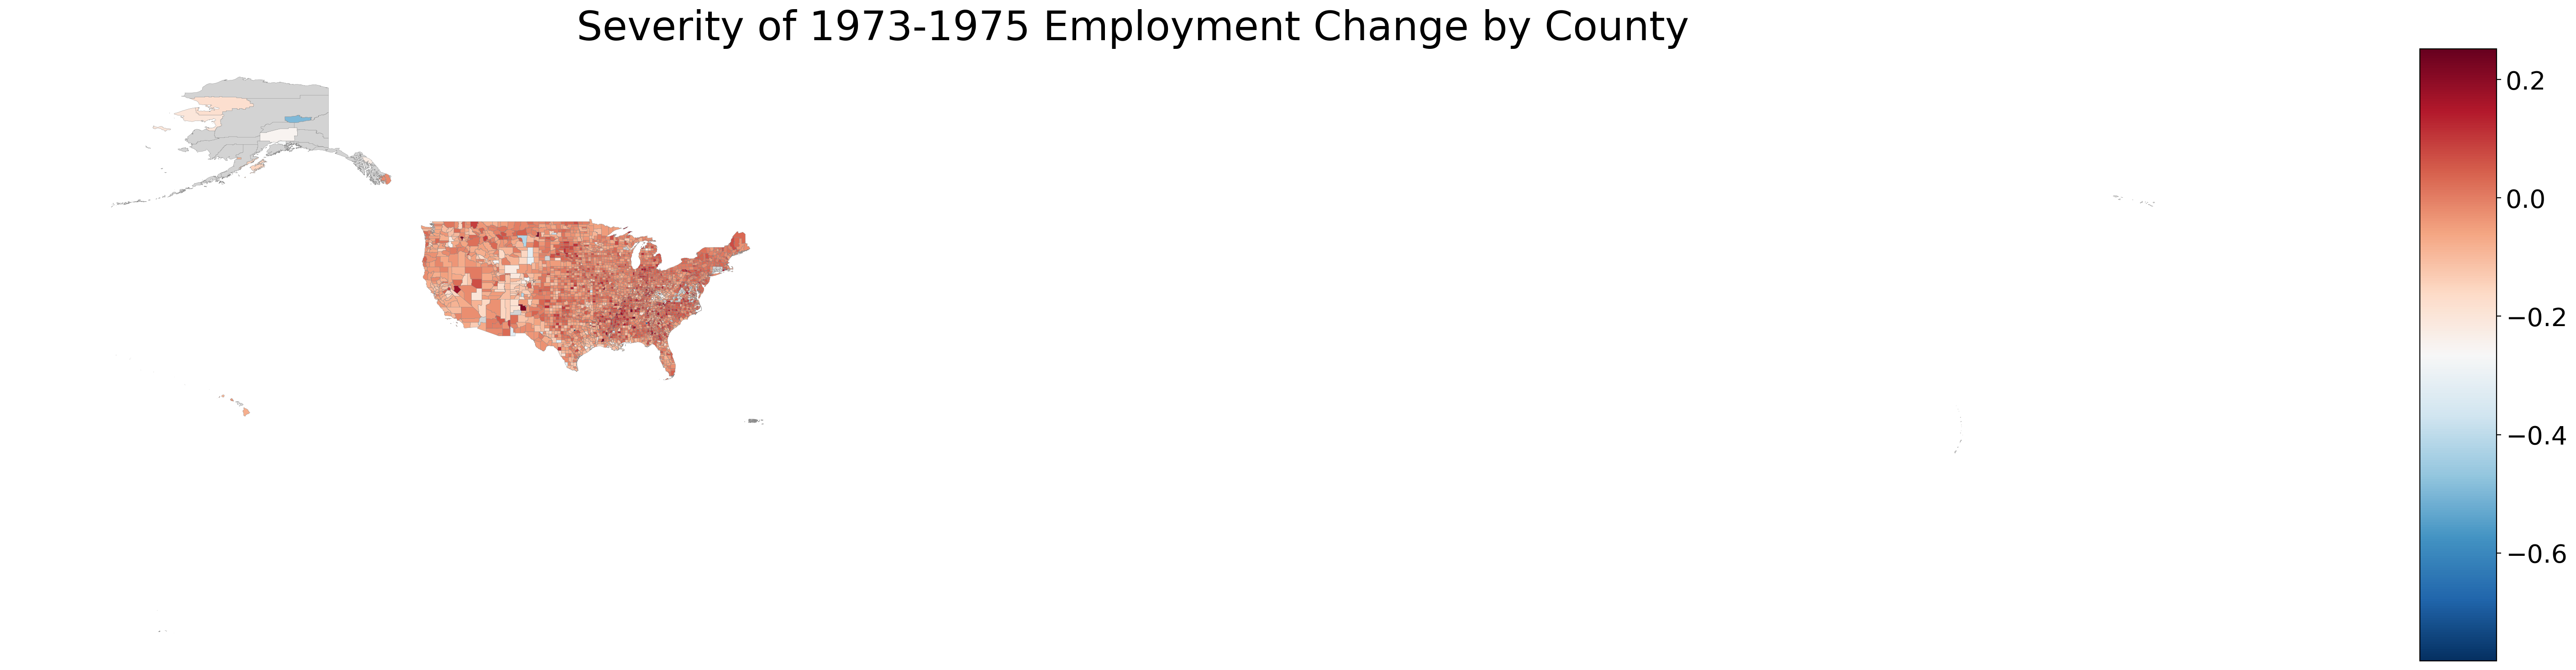

In [70]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Use the higher-resolution US Census Bureau 500k county shapefile
county_map = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2022/shp/cb_2022_us_county_500k.zip')

# Ensure FIPS codes are strings and zero-padded to 5 digits
county_map['FIPS'] = county_map['STATEFP'] + county_map['COUNTYFP']
all_states_wage_salary['FIPS_str'] = all_states_wage_salary['FIPS'].astype(str).str.zfill(5)

# Aggregate severity metric if duplicates exist (e.g., use first)
county_severity = all_states_df[['FIPS_str', '1973_75_severity']].drop_duplicates(subset='FIPS_str')

# Merge the county shapefile with severity data
county_map = county_map.merge(county_severity, left_on='FIPS', right_on='FIPS_str', how='left')

# Make a figure with two axes: map and legend, using axes_grid1 for proportion
fig, ax = plt.subplots(figsize=(30, 20), dpi=200)  # Larger and higher DPI for clarity
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)  # Legend much narrower

# Plot the map on the main axis, turn off built-in legend
county_map_plot = county_map.plot(
    column='1973_75_severity', 
    cmap='RdBu_r',  # FLIPPED colormap
    linewidth=0.15,  # Slightly wider lines for high-res
    ax=ax, 
    edgecolor='grey',
    legend=False,  # We'll add colorbar manually
    missing_kwds={"color": "lightgrey", "label": "No Data"}
)

# Gather the plotted collection for colorbar
norm = plt.Normalize(
    vmin=county_map['1973_75_severity'].min(skipna=True),
    vmax=county_map['1973_75_severity'].max(skipna=True)
)
sm = plt.cm.ScalarMappable(cmap='RdBu_r', norm=norm)
sm.set_array([])

# Add a colorbar (legend) manually with small width axis
cbar = fig.colorbar(
    sm,
    cax=cax,
    orientation='vertical',
)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('', size=20)

ax.set_title('Severity of 1973-1975 Employment Change by County', fontsize=32)
ax.axis('off')

plt.tight_layout()
plt.show()
